<a href="https://colab.research.google.com/github/rolex4301/Load_Balancing_Simulation-/blob/main/Load_Balancing_Simu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can use https://github.blog/engineering/infrastructure/glb-director-open-source-load-balancer/ to understand
for ppt https://www.haproxy.com/user-spotlight-series/inside-the-github-load-balancer

Now when I tried to make load balancer.

In [58]:
import random
import copy
import time
import matplotlib.pyplot as plt

# Create Machines and jobs

In [59]:
# Create Jobs and Machines
# Function to initialize machines and jobs
def create_jobs_and_machines(m, n, runtime_range=(1, 100)):
    # Initialize machines with a total runtime of 0
    machines = [{"machine_id": i+1, "total_runtime": 0, "jobs": []} for i in range(m)]

    # Create jobs with random processing times
    jobs = [{"job_id": i+1, "runtime": random.randint(*runtime_range)} for i in range(n)]

    return machines, jobs

In [60]:
# Number of machines and jobs
m = 100  # Number of machines
n = 10000 # Number of jobs

# Create machines and jobs
machines, jobs = create_jobs_and_machines(m, n)

machines_SBA, jobs_SBA = copy.deepcopy(machines), copy.deepcopy(jobs)
machines_RR, jobs_RR = copy.deepcopy(machines), copy.deepcopy(jobs)
machines_ZZ, jobs_ZZ = copy.deepcopy(machines), copy.deepcopy(jobs)
machines_GA, jobs_GA = copy.deepcopy(machines), copy.deepcopy(jobs)

# Algorithms

In [61]:
# Greedy Algorithm
# Function to implement scheduling based on assigning to the least busy machine
def minimum_busy_machine_scheduling(machines, jobs):

    # Assign each job to the machine with the least total runtime
    for job in jobs:
        # Find the machine with the least total runtime
        least_busy_machine = min(machines, key=lambda x: x["total_runtime"])

        # Assign the job to this machine
        least_busy_machine["jobs"].append(job)
        least_busy_machine["total_runtime"] += job["runtime"]

    return machines

In [62]:
# Sorted Balance Algorithm (1.5-Approximation)
# Function to implement Sorted Balance Algorithm (1.5-Approximation)
def sorted_balance_algorithm(machines, jobs):
    # Sort jobs by decreasing runtime (longest jobs first)
    sorted_jobs = sorted(jobs, key=lambda x: x["runtime"], reverse=True)

    # Assign each job to the machine with the least total runtime
    for job in sorted_jobs:
        # Find the machine with the least total runtime
        least_loaded_machine = min(machines, key=lambda x: x["total_runtime"])

        # Assign the job to this machine
        least_loaded_machine["jobs"].append(job)
        least_loaded_machine["total_runtime"] += job["runtime"]

    return machines

In [63]:
# Round Robin Scheduling
# Function to implement Round Robin scheduling after sorting jobs in descending order
def round_robin_scheduling(machines, jobs):
    # Sort jobs by decreasing runtime (longest jobs first)
    sorted_jobs = sorted(jobs, key=lambda x: x["runtime"], reverse=True)

    # Assign jobs in a round robin manner
    for index, job in enumerate(sorted_jobs):
        # Assign job to the next machine in round-robin fashion
        machine = machines[index % len(machines)]
        machine["jobs"].append(job)
        machine["total_runtime"] += job["runtime"]

    return machines

In [64]:
# Zigzag Scheduling
def zigzag_scheduling(machines, jobs):
    # Sort jobs by decreasing runtime (longest jobs first)
    sorted_jobs = sorted(jobs, key=lambda x: x["runtime"], reverse=True)

    # Track the direction: forward (M1 to Mm) or backward (Mm to M1)
    forward = True
    machine_count = len(machines)

    index = 0
    while index < len(sorted_jobs):
        # If forward is True, assign jobs from M1 to Mm
        if forward:
            for i in range(machine_count):
                if index < len(sorted_jobs):
                    machine = machines[i]
                    job = sorted_jobs[index]
                    machine["jobs"].append(job)
                    machine["total_runtime"] += job["runtime"]
                    index += 1
        # If forward is False, assign jobs from Mm to M1
        else:
            for i in range(machine_count-1, -1, -1):
                if index < len(sorted_jobs):
                    machine = machines[i]
                    job = sorted_jobs[index]
                    machine["jobs"].append(job)
                    machine["total_runtime"] += job["runtime"]
                    index += 1

        # Switch direction
        forward = not forward

    return machines

# Run Algo

Time taken by sorted_balance_algorithm: 105.34477233886719 miliseconds
Final Assignment of Jobs to Machines (Minimum Busy Machine Scheduling):


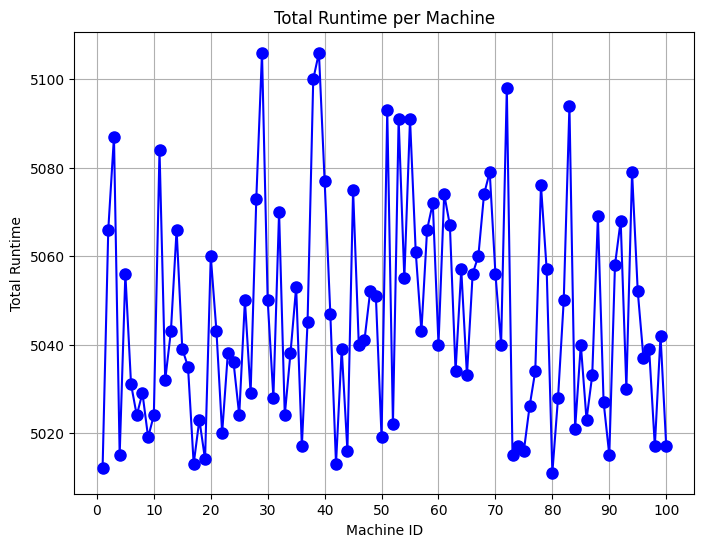


Machine with Maximum Total Runtime: 29 (Total Runtime: 5106)


In [65]:
# Run the Greedy Algorithm
start_time = time.time()
machines_after_scheduling_GA = minimum_busy_machine_scheduling(machines_GA, jobs_GA)
end_time = time.time()

time_taken_GA = (end_time - start_time)*1000

print(f"Time taken by sorted_balance_algorithm: {time_taken_GA} miliseconds")

# Display the assignment results
print("Final Assignment of Jobs to Machines (Minimum Busy Machine Scheduling):")
#for machine in machines_after_scheduling_GA:
#    print(f"Machine {machine['machine_id']} (Total Runtime: {machine['total_runtime']}): Jobs: {machine['jobs']}")

# Function to plot the total runtime vs machine id
machine_ids = [machine["machine_id"] for machine in machines_after_scheduling_GA]
total_runtimes = [machine["total_runtime"] for machine in machines_after_scheduling_GA]

plt.figure(figsize=(8, 6))
plt.plot(machine_ids, total_runtimes, marker='o', linestyle='-', color='b', markersize=8)

# Adding labels and title
plt.xlabel("Machine ID")
plt.ylabel("Total Runtime")
plt.title("Total Runtime per Machine")

# Customize x-axis with class intervals of 10
x_ticks = range(0, m+1, int(m/10))  # X-axis tick marks from 0 to 100 in steps of 10
plt.xticks(x_ticks)

# Display grid and plot
plt.grid(True)
plt.show()

# Print the Machine ID with maximum total runtime
max_runtime_machine_GA = max(machines_after_scheduling_GA, key=lambda x: x["total_runtime"])
print(f"\nMachine with Maximum Total Runtime: {max_runtime_machine_GA['machine_id']} (Total Runtime: {max_runtime_machine_GA['total_runtime']})")


Time taken by sorted_balance_algorithm: 190.19556045532227 miliseconds
Final Assignment of Jobs to Machines (Sorted Balance Algorithm):


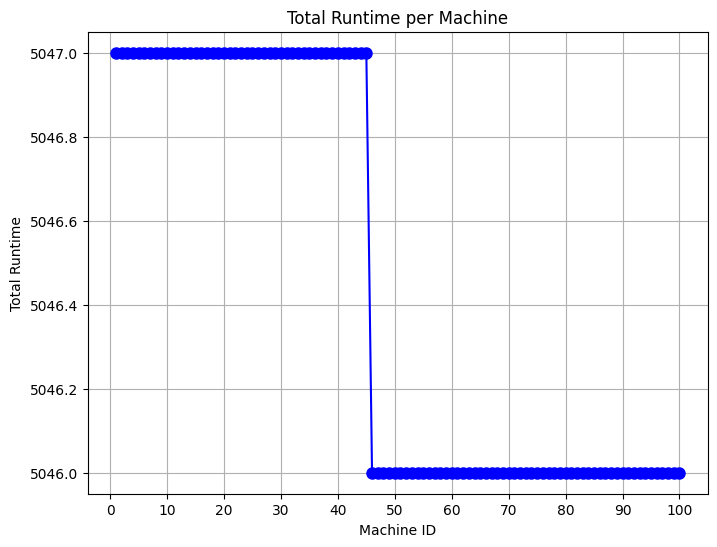


Machine with Maximum Total Runtime: 1 (Total Runtime: 5047)


In [66]:
# Run the Sorted Balance Algorithm
start_time = time.time()
machines_after_scheduling_SBA = sorted_balance_algorithm(machines_SBA, jobs_SBA)
end_time = time.time()

time_taken_SBA = (end_time - start_time) * 1000
print(f"Time taken by sorted_balance_algorithm: {time_taken_SBA} miliseconds")

# Display the assignment results
print("Final Assignment of Jobs to Machines (Sorted Balance Algorithm):")
#for machine in machines_after_scheduling_SBA:
#    print(f"Machine {machine['machine_id']} (Total Runtime: {machine['total_runtime']}): Jobs: {machine['jobs']}")

# Function to plot the total runtime vs machine id
machine_ids = [machine["machine_id"] for machine in machines_after_scheduling_SBA]
total_runtimes = [machine["total_runtime"] for machine in machines_after_scheduling_SBA]

plt.figure(figsize=(8, 6))
plt.plot(machine_ids, total_runtimes, marker='o', linestyle='-', color='b', markersize=8)

# Adding labels and title
plt.xlabel("Machine ID")
plt.ylabel("Total Runtime")
plt.title("Total Runtime per Machine")

# Customize x-axis with class intervals of 10
x_ticks = range(0, m+1, int(m/10))  # X-axis tick marks from 0 to 100 in steps of 10
plt.xticks(x_ticks)

# Display grid and plot
plt.grid(True)
plt.show()

# Print the Machine ID with maximum total runtime
max_runtime_machine_SBA = max(machines_after_scheduling_SBA, key=lambda x: x["total_runtime"])
print(f"\nMachine with Maximum Total Runtime: {max_runtime_machine_SBA['machine_id']} (Total Runtime: {max_runtime_machine_SBA['total_runtime']})")


Time taken by round_robin_scheduling: 18.822669982910156 miliseconds
Final Assignment of Jobs to Machines (Round Robin Scheduling):


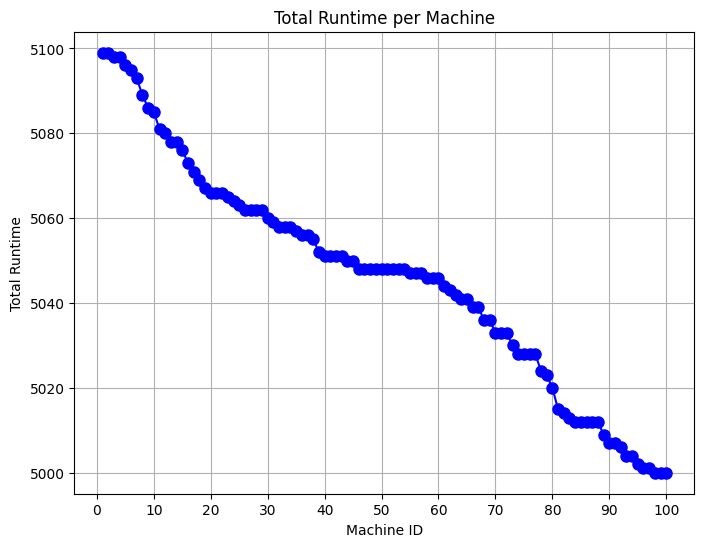


Machine with Maximum Total Runtime: 1 (Total Runtime: 5099)


In [67]:
# Run the Round Robin Scheduling Algorithm
start_time = time.time()
machines_after_scheduling_RR = round_robin_scheduling(machines_RR, jobs_RR)
end_time = time.time()

time_taken_RR = (end_time - start_time) * 1000
print(f"Time taken by round_robin_scheduling: {time_taken_RR} miliseconds")

# Display the assignment results
print("Final Assignment of Jobs to Machines (Round Robin Scheduling):")
#for machine in machines_after_scheduling_RR:
#    print(f"Machine {machine['machine_id']} (Total Runtime: {machine['total_runtime']}): Jobs: {machine['jobs']}")

# Function to plot the total runtime vs machine id
machine_ids = [machine["machine_id"] for machine in machines_after_scheduling_RR]
total_runtimes = [machine["total_runtime"] for machine in machines_after_scheduling_RR]

plt.figure(figsize=(8, 6))
plt.plot(machine_ids, total_runtimes, marker='o', linestyle='-', color='b', markersize=8)

# Adding labels and title
plt.xlabel("Machine ID")
plt.ylabel("Total Runtime")
plt.title("Total Runtime per Machine")

# Customize x-axis with class intervals of 10
x_ticks = range(0, m+1, int(m/10))  # X-axis tick marks from 0 to 100 in steps of 10
plt.xticks(x_ticks)

# Display grid and plot
plt.grid(True)
plt.show()

# Print the Machine ID with maximum total runtime
max_runtime_machine_RR = max(machines_after_scheduling_RR, key=lambda x: x["total_runtime"])
print(f"\nMachine with Maximum Total Runtime: {max_runtime_machine_RR['machine_id']} (Total Runtime: {max_runtime_machine_RR['total_runtime']})")


Time taken by zigzag_scheduling: 16.865253448486328 miliseconds
Final Assignment of Jobs to Machines (Zigzag Scheduling):


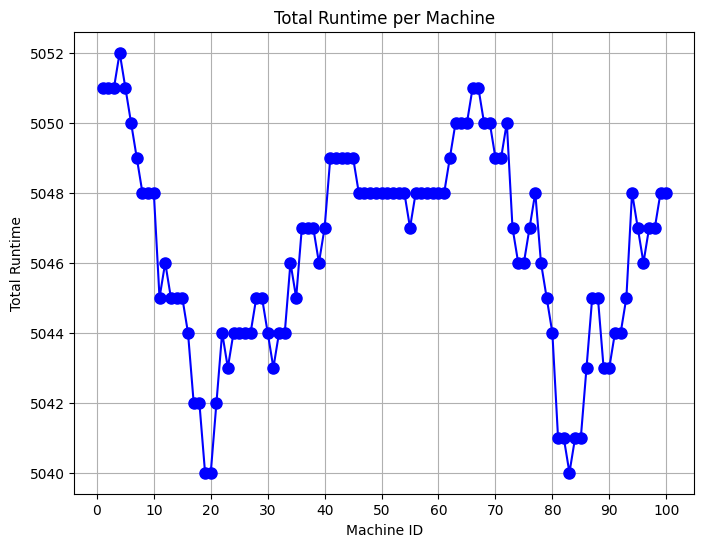


Machine with Maximum Total Runtime: 4 (Total Runtime: 5052)


In [68]:
# Run the Zigzag Scheduling Algorithm
start_time = time.time()
machines_after_scheduling_ZZ = zigzag_scheduling(machines_ZZ, jobs_ZZ)
end_time = time.time()

time_taken_ZZ = (end_time - start_time) * 1000
print(f"Time taken by zigzag_scheduling: {time_taken_ZZ} miliseconds")

# Display the assignment results
print("Final Assignment of Jobs to Machines (Zigzag Scheduling):")
#for machine in machines_after_scheduling_ZZ:
#    print(f"Machine {machine['machine_id']} (Total Runtime: {machine['total_runtime']}): Jobs: {machine['jobs']}")

# Function to plot the total runtime vs machine id
machine_ids = [machine["machine_id"] for machine in machines_after_scheduling_ZZ]
total_runtimes = [machine["total_runtime"] for machine in machines_after_scheduling_ZZ]

plt.figure(figsize=(8, 6))
plt.plot(machine_ids, total_runtimes, marker='o', linestyle='-', color='b', markersize=8)

# Adding labels and title
plt.xlabel("Machine ID")
plt.ylabel("Total Runtime")
plt.title("Total Runtime per Machine")

# Customize x-axis with class intervals of 10
x_ticks = range(0, m+1, int(m/10))  # X-axis tick marks from 0 to 100 in steps of 10
plt.xticks(x_ticks)

# Display grid and plot
plt.grid(True)
plt.show()

# Print the Machine ID with maximum total runtime
max_runtime_machine_ZZ = max(machines_after_scheduling_ZZ, key=lambda x: x["total_runtime"])
print(f"\nMachine with Maximum Total Runtime: {max_runtime_machine_ZZ['machine_id']} (Total Runtime: {max_runtime_machine_ZZ['total_runtime']})")

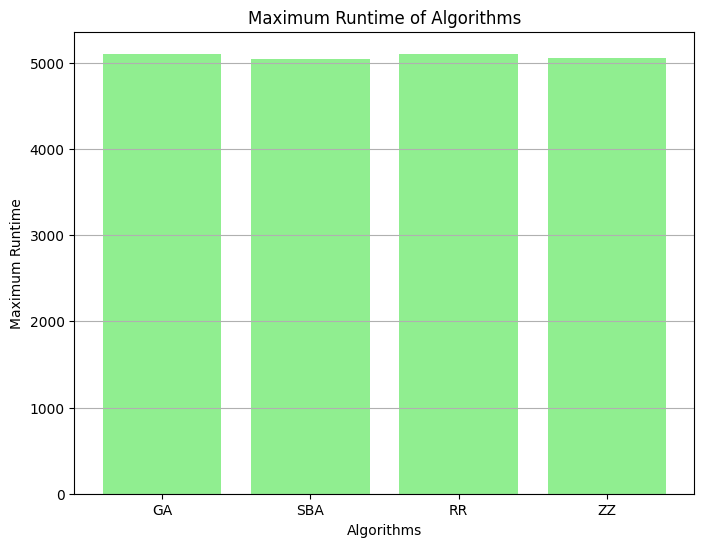

In [69]:
# Plotting Total Runtime

# Names of the algorithms
algorithms = ['GA', 'SBA', 'RR', 'ZZ']

# Corresponding runtimes
runtimes = [max_runtime_machine_GA['total_runtime'], max_runtime_machine_SBA['total_runtime'], max_runtime_machine_RR['total_runtime'], max_runtime_machine_ZZ['total_runtime']]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(algorithms, runtimes, color='lightgreen')

# Adding labels and title
plt.xlabel("Algorithms")
plt.ylabel("Maximum Runtime")
plt.title("Maximum Runtime of Algorithms")
plt.grid(True, axis='y')

# Display the plot
plt.show()

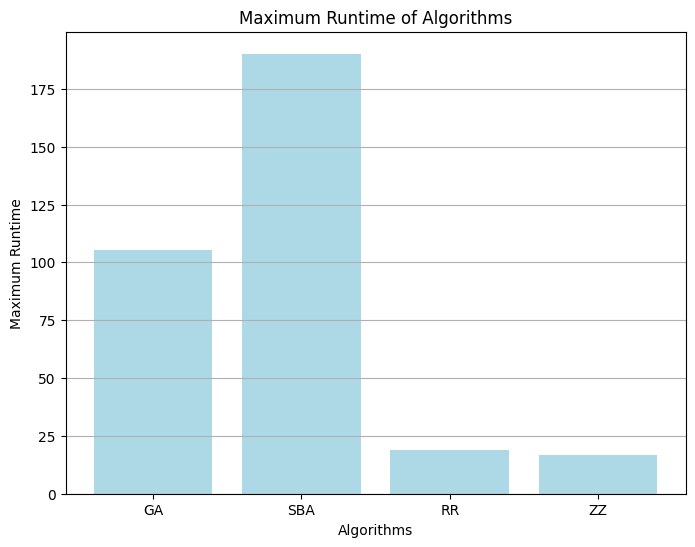

In [70]:
# Plotting Total Runtime

# Names of the algorithms
algorithms = ['GA', 'SBA', 'RR', 'ZZ']

# Corresponding runtimes
runtimes = [time_taken_GA, time_taken_SBA, time_taken_RR, time_taken_ZZ]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(algorithms, runtimes, color='lightblue')

# Adding labels and title
plt.xlabel("Algorithms")
plt.ylabel("Maximum Runtime")
plt.title("Maximum Runtime of Algorithms")
plt.grid(True, axis='y')

# Display the plot
plt.show()

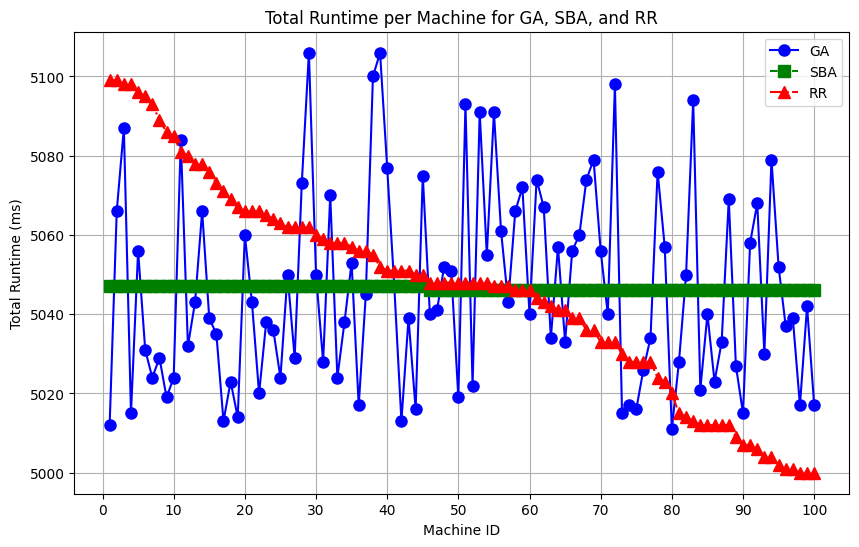

In [71]:
import matplotlib.pyplot as plt

# Assuming the following variables are already defined based on your data:
machine_ids_GA = [machine["machine_id"] for machine in machines_after_scheduling_GA]
total_runtimes_GA = [machine["total_runtime"] for machine in machines_after_scheduling_GA]

machine_ids_SBA = [machine["machine_id"] for machine in machines_after_scheduling_SBA]
total_runtimes_SBA = [machine["total_runtime"] for machine in machines_after_scheduling_SBA]

machine_ids_RR = [machine["machine_id"] for machine in machines_after_scheduling_RR]
total_runtimes_RR = [machine["total_runtime"] for machine in machines_after_scheduling_RR]

# Plotting all three in a single plot
plt.figure(figsize=(10, 6))

# Plot for Greedy Algorithm (GA)
plt.plot(machine_ids_GA, total_runtimes_GA, marker='o', linestyle='-', color='b', markersize=8, label="GA")

# Plot for Sorted Balance Algorithm (SBA)
plt.plot(machine_ids_SBA, total_runtimes_SBA, marker='s', linestyle='--', color='g', markersize=8, label="SBA")

# Plot for Round Robin (RR)
plt.plot(machine_ids_RR, total_runtimes_RR, marker='^', linestyle='-.', color='r', markersize=8, label="RR")

# Adding labels and title
plt.xlabel("Machine ID")
plt.ylabel("Total Runtime (ms)")
plt.title("Total Runtime per Machine for GA, SBA, and RR")

# Customize x-axis with class intervals of 10
x_ticks = range(0, 101, 10)  # Adjust if machine IDs go up to 100, otherwise change the range
plt.xticks(x_ticks)

# Display grid
plt.grid(True)

# Add legend to differentiate the algorithms
plt.legend()

# Display the plot
plt.show()
